<a href="https://colab.research.google.com/github/sota-ogawa/TU-math-study/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [2]:
# 必要なライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# k分割交差検証の実行
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

# 結果の表示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.904 0.912 0.956 0.939 0.956]
Cross validation scores: 0.933+-0.022


ベストスコア:0.91
その時のパラメータ(gamma, C):(0.001, 1.0)


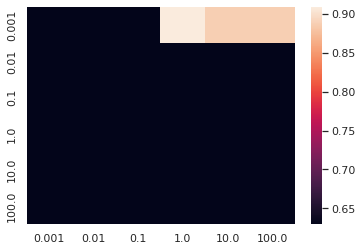

In [3]:
# インポート
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける 
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=0)

# ハイパーパラメータのすべての組み合わせでモデルを構築・検証
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train,y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

# 検証結果をscoresに格納 
scores = pd.Series(scores)

# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma, C):{}'.format(scores.idxmax()))

# ヒートマップを表示。縦軸にgamma、横軸にCを表示
sns.heatmap(scores.unstack())

In [4]:
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
#データセットをロード
iris = load_iris()
#predictor と　target に分ける
X = iris.data
#Iris Setosaが１の値をとり、それ以外は０
Y = (iris.target==0).astype(int)

In [6]:
#データセットのシャッフルをして、トレーニング用とテスト用のデータに分ける
#モデルの評価をしっかりやりたい時は、cross validationを実行、さらにハイパーパラメータの最適化を行う
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = 0.3, random_state=42, shuffle=True)

In [7]:
#トレーニング
perc_clf = Perceptron()
perc_clf.fit(train_X,train_Y)

Perceptron()

In [8]:
#テスト
predictions  = perc_clf.predict(test_X)

In [9]:
#Accuracyを計算
print("Accuracy: " +str(accuracy_score(test_Y,predictions))) 


Accuracy: 1.0


In [10]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#データセットをロード
iris = load_iris()
#predictor と　target に分ける
X = iris.data 
Y = iris.target

In [ ]:
#データセットのシャッフルをして、トレーニング用とテスト用のデータに分ける
#モデルの評価をしっかりやりたい時は、validationのデータセットを作るのが良い。
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size = 0.3, random_state=42, shuffle=True)


In [11]:
#二つのHidden Layer を追加、それぞれ10個のニューロンを持つ
mlp_clsf = MLPClassifier((10,10),activation ='relu',learning_rate='constant',learning_rate_init=0.001)
mlp_clsf.fit(train_X,train_Y)
predictions = mlp_clsf.predict(test_X)
print("Accuracy: "+str(accuracy_score(test_Y,predictions)))

Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [12]:
#確率の合計が１かを確認
mlp_clsf.predict_proba(test_X[0].reshape(1,-1)).sum()

1.000

In [13]:
mlp_clsf.out_activation_


'logistic'

In [14]:
from sklearn.datasets import load_boston
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
#データセットをロード
dataset  = load_boston()
X = dataset['data']
Y = dataset['target']
#テストとトレーニングのデータセットに分ける
#モデルの評価をしっかりやりたい時は、validationのデータセットを作るのが良い。
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size = 0.3, random_state = 42, shuffle =True)
#２個のhidden layerを追加　activation function は relu.
mlp_reg = MLPRegressor((10,10),activation ='relu',learning_rate='constant',learning_rate_init=0.001,max_iter=3000,random_state=42)
mlp_reg.fit(train_X,train_Y)
predictions = mlp_reg.predict(test_X)
#RSMEを計算
error = mean_squared_error(test_Y,predictions) ** (1/2)
print("RSME: " +str(error))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

RSME: 4.699377521565086


In [16]:
mlp_reg.out_activation_

'identity'

In [17]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler


In [18]:
#データセットをダウンロード
house_price = keras.datasets.boston_housing 
#データをtraining, validation, test に分ける
(train_X, train_Y), (test_X, test_Y) = house_price.load_data()
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y)

65536/57026 [==================================] - 0s 0us/step


In [19]:
#変数をスケーリング　最適化を早くするため
scaler  = StandardScaler() 
train_X = scaler.fit_transform(train_X)
valid_X = scaler.fit_transform(valid_X)
test_X = scaler.fit_transform(test_X)

In [20]:
#KerasのSequential model を使う
keras_model = keras.models.Sequential() 
#インプットレイヤーを追加
keras_model.add(tf.keras.Input(shape=train_X.shape[1:],)) 
#Hidden layer を追加
keras_model.add(tf.keras.layers.Dense(30,activation="relu"))
#Output layer を追加
keras_model.add(tf.keras.layers.Dense(1))

keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [21]:
#モデルをコンパイル
keras_model.compile(loss="mean_squared_error", optimizer="sgd",metrics=[tf.keras.metrics.RootMeanSquaredError(
name="root_mean_squared_error", dtype=None)])
#モデルをトレーニング
#validationのデータセットがあれば、それを渡すことで、validationに関してのlossやRMSEの計算なども簡単にできる。
history = keras_model.fit(train_X, train_Y, epochs=70, validation_data=(valid_X, valid_Y))

Epoch 1/70
10/10 [==============================] - 1s 22ms/step - loss: 200.4318 - root_mean_squared_error: 14.1574 - val_loss: 46.0216 - val_root_mean_squared_error: 6.7839
Epoch 2/70
10/10 [==============================] - 0s 6ms/step - loss: 19.8286 - root_mean_squared_error: 4.4529 - val_loss: 36.4145 - val_root_mean_squared_error: 6.0344
Epoch 3/70
10/10 [==============================] - 0s 7ms/step - loss: 15.1262 - root_mean_squared_error: 3.8892 - val_loss: 34.4836 - val_root_mean_squared_error: 5.8723
Epoch 4/70
10/10 [==============================] - 0s 5ms/step - loss: 11.6251 - root_mean_squared_error: 3.4096 - val_loss: 27.2653 - val_root_mean_squared_error: 5.2216
Epoch 5/70
10/10 [==============================] - 0s 5ms/step - loss: 9.7741 - root_mean_squared_error: 3.1264 - val_loss: 27.0523 - val_root_mean_squared_error: 5.2012
Epoch 6/70
10/10 [==============================] - 0s 6ms/step - loss: 10.9674 - root_mean_squared_error: 3.3117 - val_loss: 27.1149 - va

In [22]:
mlp_reg = MLPRegressor((10,10),activation ='relu',learning_rate='constant',learning_rate_init=0.001,max_iter=3000,random_state=42)

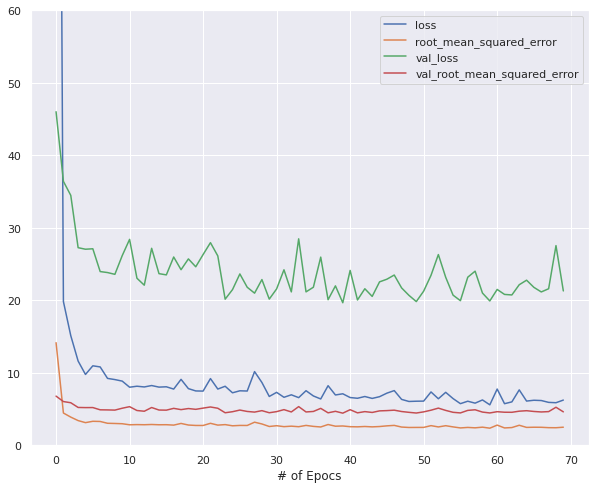

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,60)
plt.xlabel("# of Epocs")
plt.show()

In [24]:
mean_squared_error(test_Y,keras_model.predict(test_X)) ** (1/2)

4.678

In [25]:
#データをダウンロードして、トレーニングとテストに分ける
import requests, zipfile
import io
url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
#res = requests.get(url).content
#データをダウンロードして、トレーニングとテストに分ける
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


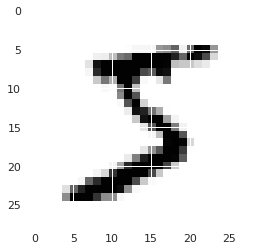

In [26]:
#イメージを実際に視覚化してみる
from matplotlib import pyplot as plt
plt.imshow(train_X[0],cmap='Greys')
plt.show()

In [27]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [28]:
#training と validationに分ける
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y)
#最適化のアルゴリズムを早くするために、変数をスケーリングします。
train_X = train_X / 255.0
valid_X = valid_X / 255.0
test_X = test_X / 255.0

In [29]:
keras_clf = keras.models.Sequential()
#input layerを作る。もともとのinputのデータが2-Dなので、1Dにします。
keras_clf.add(keras.layers.Flatten(input_shape=[28,28]))
#output layer を作る.10個のクラスがあるので、10個のニューロンが必要。
keras_clf.add(keras.layers.Dense(10,activation = 'softmax'))
keras_clf.summary()
keras_clf.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])
history = keras_clf.fit(train_X, train_Y, epochs=20, validation_data=(valid_X, valid_Y))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1407/1407 [==============================] - 4s 2ms/step - loss: 0.8627 - accuracy: 0.7976 - val_loss: 0.5458 - val_accuracy: 0.8659
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4953 - accuracy: 0.8731 - val_loss: 0.4457 - val_accuracy: 0.8841
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4326 - accuracy: 0.8850 - val_loss: 0.4046 - val_accuracy: 0.8915
Epoch 4/20
1407/

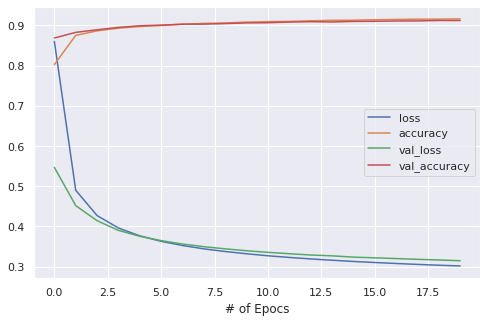

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.xlabel("# of Epocs")
plt.show()

In [30]:
#accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy: " +str(accuracy_score(test_Y,keras_clf.predict(test_X).argmax(axis=-1))))

Accuracy: 0.9163


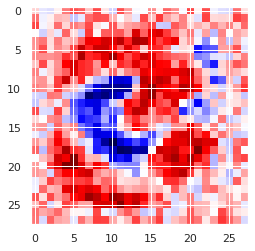

In [31]:
#3のアウトプットノードに関連する重みを全部取って、28*28の2-Dに変換
plt.imshow(np.reshape(keras_clf.get_weights()[0][:,3],(28,28)),cmap="seismic")